## 1

In [391]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants,optimize,integrate
import cmath

In [77]:
a=10**(-10)
V=10*0.001*constants.e
h=constants.hbar
m=constants.m_p
z0=(a/h)*np.sqrt(2*m*V)
print(z0)

2.195295191313747


In [82]:
def Y(z):
    return (cmath.sqrt(((z0/z)**2)-1))

In [83]:
def w(z):
    return(np.tan(z)-Y(z).real)

In [530]:
o=[]
N=6
for i in np.arange(0,N,1):
    o.append(optimize.brentq(w,(2*i)*np.pi/2,((2*i)+1)*np.pi/2))


C:\Users\vanda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [531]:
for i in range(len(o)):
    print('E(eV):',((((h*o[i]/a)**2)/((2*m)))-V)/constants.e)


E(eV): -0.007648577955249643
E(eV): 0.010479242715272211
E(eV): 0.07191697086108885
E(eV): 0.17431318443744998
E(eV): 0.31766788344435537
E(eV): 0.5019810678818053


## 2

In [511]:

hc = h*constants.c 
l_1 = 390  
l_2 = 750  
kb = constants.Boltzmann
li1 = hc/(l_2*kb)
li2= hc/(l_1*kb)
accu = 1  

In [512]:
def f(x):
    return(x**3/(np.exp(x)-1))

In [513]:
def n(T):
        N = 100
        limit1=li1/T
        limit2=li2/T
        x, w = np.polynomial.legendre.leggauss(N)
        x1=(0.5*(limit2-limit1)*x)+(0.5*(limit2+limit1))
        w1=0.5*(limit2-limit1)*w
        int1 = 0.0
        for i in range(N):
            int1 += w1[i] * f(x1[i])

        return (15/(np.pi**4))*int1

In [514]:
I=[]
for i in np.linspace(300,8000,1000):
    I.append(n(i))

Text(0, 0.5, 'n(T)')

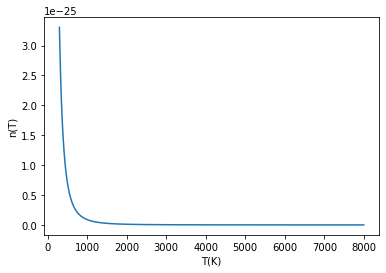

In [515]:
T=np.linspace(300,8000,1000)
plt.plot(T,I)
plt.xlabel('T(K)')
plt.ylabel('n(T)')

In [516]:
z=(1 + np.sqrt(5))/2  
T1=6000
T4=8000
T2=T4-(T4-T1)/z
T3=T4+(T4-T1)/z
n1=n(T1)
n2=n(T2)
n3=n(T3)
n4=n(T4)
while T4-T1>accu:
    if n2 < n3 :
        T4,n4=T3,n3
        T3,n3=T2,n2
        T2=T4-(T4-T1)/z
        n2=n(T2)
    else:
        T1,n1 =T2,n2
        T2,n2 =T3,n3
        T3=T1+(T4-T1)/z
        n3=n(T3)

print('T_max(K):', 0.5 * (T1 + T4))



NameError: name 'accu' is not defined

The melting point of Tungsten is 3695.15 K. It will melt at 7000K, hence, it is not practical. 